In [1]:
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
from sklearn.base import clone

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


from sklearn.datasets import load_digits

In [2]:
df1 = pd.read_csv('data/S07-hw-dataset-01.csv')

display(df1.head())
display(df1.info(), df1.describe())

X1 = df1.iloc[:, 1:]
y1_true = df1.iloc[:, :1]

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


None

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [3]:
df2 = pd.read_csv('data/S07-hw-dataset-02.csv')

display(df2.head())
display(df2.info(), df2.describe())

X2 = df2.iloc[:, 1:]
y2_true = df2.iloc[:, :1]

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


None

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [4]:
df3 = pd.read_csv('data/S07-hw-dataset-03.csv')

display(df3.head())
display(df3.info(), df3.describe())

X3 = df3.iloc[:, 1:]
y3_true = df3.iloc[:, :1]

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


None

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [5]:
# Диапазон K для KMeans
kmeans_ks = list(range(2, 21))

# Сетка для DBSCAN: eps и min_samples
dbscan_eps = [1.5, 2.0, 2.5, 3.0, 3.5, 0.5]
dbscan_min_samples = [3, 5, 10, 15]

# Agglomerative: число кластеров и linkage 
agg_ks = list(range(2, 21))
agg_linkages = ["ward", "complete", "average"]

In [6]:
# Настройки PCA
pca_dim = 8

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

if pca_dim is None:
    X1_feat = X1_scaled
    pca_model = None
else:
    pca_model = PCA(n_components=pca_dim, random_state=RANDOM_STATE)
    X1_feat = pca_model.fit_transform(X1_scaled)

print("X_scaled.shape:", X1_scaled.shape)
print("X_feat.shape:", X1_feat.shape)

X_scaled.shape: (12000, 8)
X_feat.shape: (12000, 8)


In [7]:
# Настройки PCA
pca_dim = 3

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

if pca_dim is None:
    X2_feat = X2_scaled
    pca_model = None
else:
    pca_model = PCA(n_components=pca_dim, random_state=RANDOM_STATE)
    X2_feat = pca_model.fit_transform(X2_scaled)

print("X_scaled.shape:", X2_scaled.shape)
print("X_feat.shape:", X2_feat.shape)

X_scaled.shape: (8000, 3)
X_feat.shape: (8000, 3)


In [8]:
# Настройки PCA
pca_dim = 4

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

if pca_dim is None:
    X3_feat = X3_scaled
    pca_model = None
else:
    pca_model = PCA(n_components=pca_dim, random_state=RANDOM_STATE)
    X3_feat = pca_model.fit_transform(X3_scaled)

print("X_scaled.shape:", X3_scaled.shape)
print("X_feat.shape:", X3_feat.shape)

X_scaled.shape: (15000, 4)
X_feat.shape: (15000, 4)


In [9]:
def safe_cluster_metrics(X, labels):
    """Считает метрики; возвращает None, если метрика неприменима."""
    unique = np.unique(labels)
    # Нужно минимум 2 кластера
    if len(unique) < 2:
        return None

    # Нельзя, чтобы все точки были в одном кластере
    if len(unique) == 1:
        return None

    # silhouette требует, чтобы все кластеры имели >1 точки (часто, но не всегда)
    # В sklearn silhouette_score может падать, если какой-то кластер пуст/особый.
    try:
        sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None

    try:
        db = float(davies_bouldin_score(X, labels))
    except Exception:
        db = None

    try:
        ch = float(calinski_harabasz_score(X, labels))
    except Exception:
        ch = None

    return {"silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch}

def pca_2d_for_plot(X_scaled, random_state=RANDOM_STATE):
    """PCA(2D) именно для визуализации."""
    p = PCA(n_components=2, random_state=random_state)
    return p.fit_transform(X_scaled)

def plot_2d_embedding(emb2d, labels, title):
    plt.figure(figsize=(7, 5))
    plt.scatter(emb2d[:, 0], emb2d[:, 1], c=labels, s=18)
    plt.title(title)
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.grid(True, alpha=0.2)
    plt.show()

def summarize_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist()))


In [10]:
#KMeans
def eval_kmeans_grid(X_feat, ks):
    results = []
    for k in ks:
        try:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
        except TypeError:
            model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)

        labels = model.fit_predict(X_feat)
        metrics = safe_cluster_metrics(X_feat, labels)

        results.append({
            "algo": "kmeans",
            "params": {"k": k},
            "labels": labels,
            "metrics": metrics,
            "inertia": float(model.inertia_),
            "n_clusters": len(np.unique(labels)),
            "noise_frac": 0.0,
        })
    return results


#"Лучший" параметр k
def pick_best_by_silhouette(results):
    best = None
    best_score = -np.inf
    for r in results:
        m = r["metrics"]
        if m is None:
            continue
        s = m["silhouette"]
        if s is None:
            continue
        if s > best_score:
            best_score = s
            best = r
    return best, best_score
    

#DBSCAN
def eval_dbscan_grid(X_feat, eps_list, min_samples_list):
    results = []
    n = len(X_feat)

    for eps in eps_list:
        for ms in min_samples_list:
            model = DBSCAN(eps=eps, min_samples=ms)
            labels = model.fit_predict(X_feat)

            noise_frac = float(np.mean(labels == -1))
            # Метрики по non-noise
            mask = labels != -1
            labels_nn = labels[mask]
            X_nn = X_feat[mask]

            # Перенумеруем метки non-noise, чтобы метрики работали корректнее (не обязательно, но аккуратно)
            if len(labels_nn) > 0:
                uniq = np.unique(labels_nn)
                mapping = {u: i for i, u in enumerate(uniq)}
                labels_nn = np.array([mapping[v] for v in labels_nn], dtype=int)

            metrics = None
            n_clusters = 0
            print("len x_nn",len(X_nn), "uniq", len(np.unique(labels_nn)), "mask", mask)
            if len(X_nn) >= 10 and len(np.unique(labels_nn)) >= 2:
                metrics = safe_cluster_metrics(X_nn, labels_nn)
                n_clusters = len(np.unique(labels_nn))

            results.append({
                "algo": "dbscan",
                "params": {"eps": float(eps), "min_samples": int(ms)},
                "labels": labels,
                "metrics": metrics,
                "inertia": None,
                "n_clusters": int(n_clusters),
                "noise_frac": float(noise_frac),
                "n_non_noise": int(mask.sum()),
            })
    return results

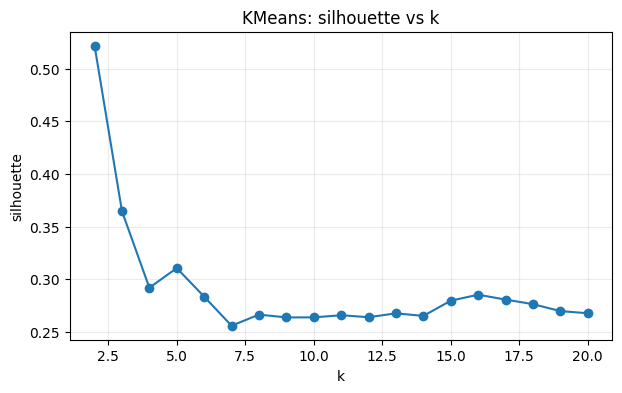

In [11]:
#Для первого датасета
#KMeans 
kmeans_results1 = eval_kmeans_grid(X1_feat, kmeans_ks)

ks = [r["params"]["k"] for r in kmeans_results1]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results1]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.savefig(f'artifacts/figures/FirstSilhouetteVsK.png')
plt.show()


In [12]:
best_kmeans1, best_kmeans_s1 = pick_best_by_silhouette(kmeans_results1)
best_kmeans1["params"], round(best_kmeans_s1, 3)

({'k': 2}, 0.522)

In [13]:
#DBSCAN 
dbscan_results1 = eval_dbscan_grid(X1_feat, dbscan_eps, dbscan_min_samples)

len x_nn 12000 uniq 3 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 3 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 3 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 3 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 2 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 12000 uniq 1 mask [ True 

In [14]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid = [r for r in dbscan_results1 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid))

# Сортировка по silhouette
valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

best_dbscan1 = valid_sorted[0] if valid_sorted else None
best_dbscan1["params"] if best_dbscan1 else "No valid config found"

Valid DBSCAN configs: 16
{'eps': 2.0, 'min_samples': 3} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 5} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 10} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.0, 'min_samples': 15} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.5, 'min_samples': 3} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.5, 'min_samples': 5} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.5, 'min_samples': 10} sil= 0.522 noise= 0.0 clusters= 2
{'eps': 2.5, 'min_samples': 15} sil= 0.522 noise= 0.0 clusters= 2


{'eps': 2.0, 'min_samples': 3}

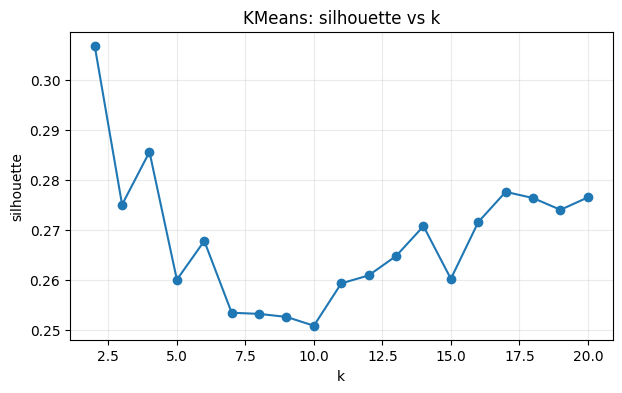

In [15]:
#Для второго датасета
#KMeans
kmeans_results2 = eval_kmeans_grid(X2_feat, kmeans_ks)

ks = [r["params"]["k"] for r in kmeans_results2]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results2]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)
plt.savefig(f'artifacts/figures/SecondSilhouetteVsK.png')
plt.show()

In [16]:
best_kmeans2, best_kmeans_s2 = pick_best_by_silhouette(kmeans_results2)
best_kmeans2["params"], round(best_kmeans_s2, 3)

({'k': 2}, 0.307)

In [17]:
#DBSCAN 
dbscan_results2 = eval_dbscan_grid(X2_feat, [0.5, 1], [3, 5, 10, 15, 25])

len x_nn 7796 uniq 32 mask [False False  True ...  True  True  True]
len x_nn 7640 uniq 14 mask [False False  True ...  True  True  True]
len x_nn 7491 uniq 2 mask [False False  True ...  True  True  True]
len x_nn 7467 uniq 1 mask [False False False ...  True  True  True]
len x_nn 7438 uniq 1 mask [False False False ...  True  True  True]
len x_nn 7987 uniq 1 mask [False  True  True ...  True  True  True]
len x_nn 7987 uniq 1 mask [False  True  True ...  True  True  True]
len x_nn 7975 uniq 1 mask [False  True  True ...  True  True  True]
len x_nn 7951 uniq 1 mask [False  True  True ...  True  True  True]
len x_nn 7755 uniq 1 mask [False  True  True ...  True  True  True]


In [18]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid = [r for r in dbscan_results2 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid))

# Сортировка по silhouette
valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

best_dbscan2 = valid_sorted[0] if valid_sorted else None
best_dbscan2["params"] if best_dbscan2 else "No valid config found"

Valid DBSCAN configs: 3
{'eps': 0.5, 'min_samples': 10} sil= 0.251 noise= 0.064 clusters= 2
{'eps': 0.5, 'min_samples': 5} sil= -0.058 noise= 0.045 clusters= 14
{'eps': 0.5, 'min_samples': 3} sil= -0.063 noise= 0.025 clusters= 32


{'eps': 0.5, 'min_samples': 10}

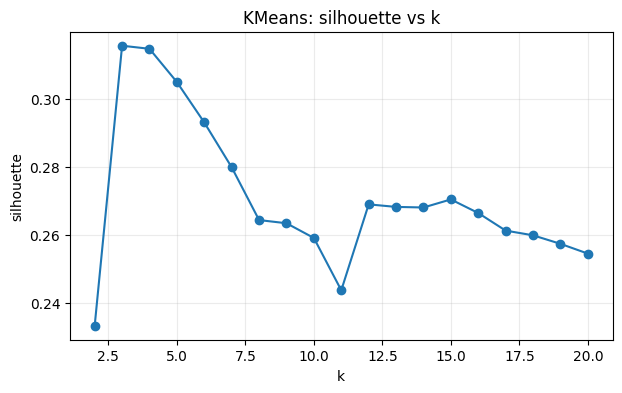

In [19]:
#Для третьего датасета
#KMeans
kmeans_results3 = eval_kmeans_grid(X3_feat, kmeans_ks)

ks = [r["params"]["k"] for r in kmeans_results3]
sil = [r["metrics"]["silhouette"] if r["metrics"] else None for r in kmeans_results3]

plt.figure(figsize=(7, 4))
plt.plot(ks, sil, marker="o")
plt.title("KMeans: silhouette vs k")
plt.xlabel("k")
plt.ylabel("silhouette")
plt.grid(True, alpha=0.25)

plt.savefig(f'artifacts/figures/ThirdSilhouetteVsK.png')
plt.show()

In [20]:
best_kmeans3, best_kmeans_s3 = pick_best_by_silhouette(kmeans_results3)
best_kmeans3["params"], round(best_kmeans_s3, 3)

({'k': 3}, 0.316)

In [21]:
#DBSCAN 
dbscan_results3 = eval_dbscan_grid(X3_feat, [0.5, 1, 2], [10, 20, 30, 40, 50])

len x_nn 14514 uniq 2 mask [ True False False ...  True  True  True]
len x_nn 14258 uniq 3 mask [ True False False ...  True  True  True]
len x_nn 13989 uniq 3 mask [ True False False ...  True  True  True]
len x_nn 13694 uniq 3 mask [ True False False ...  True  True  True]
len x_nn 13413 uniq 4 mask [ True False False ...  True  True  True]
len x_nn 14989 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 14980 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 14974 uniq 1 mask [ True False  True ...  True  True  True]
len x_nn 14967 uniq 1 mask [ True False  True ...  True  True  True]
len x_nn 14963 uniq 1 mask [ True False  True ...  True  True  True]
len x_nn 15000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 15000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 15000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 15000 uniq 1 mask [ True  True  True ...  True  True  True]
len x_nn 15000 uniq 1 mask [ True 

In [22]:
# Посмотрим, какие варианты вообще дали >=2 кластера (без шума) и посчитали silhouette
valid = [r for r in dbscan_results3 if r["metrics"] is not None and r["metrics"]["silhouette"] is not None]
print("Valid DBSCAN configs:", len(valid))

# Сортировка по silhouette
valid_sorted = sorted(valid, key=lambda r: r["metrics"]["silhouette"], reverse=True)
for r in valid_sorted[:8]:
    print(r["params"], "sil=", round(r["metrics"]["silhouette"], 3), "noise=", round(r["noise_frac"], 3), "clusters=", r["n_clusters"])

best_dbscan3 = valid_sorted[0] if valid_sorted else None
best_dbscan3["params"] if best_dbscan3 else "No valid config found"

Valid DBSCAN configs: 5
{'eps': 0.5, 'min_samples': 50} sil= 0.227 noise= 0.106 clusters= 4
{'eps': 0.5, 'min_samples': 40} sil= 0.193 noise= 0.087 clusters= 3
{'eps': 0.5, 'min_samples': 30} sil= 0.189 noise= 0.067 clusters= 3
{'eps': 0.5, 'min_samples': 20} sil= 0.184 noise= 0.049 clusters= 3
{'eps': 0.5, 'min_samples': 10} sil= 0.142 noise= 0.032 clusters= 2


{'eps': 0.5, 'min_samples': 50}

In [23]:
#Результаты
#метрики считаем на non-noise точках
def print_result_card(name, result):
    m = result["metrics"] or {}
    print("=" * 72)
    print(f"{name}")
    print("algo:", result["algo"])
    print("params:", result["params"])
    print("n_clusters:", result.get("n_clusters"))
    if result["algo"] == "dbscan":
        print("noise_frac:", round(result.get("noise_frac", 0.0), 3), " non-noise:", result.get("n_non_noise"))
    print("metrics:")
    print("  silhouette:", None if m.get("silhouette") is None else round(m["silhouette"], 3))
    print("  davies_bouldin:", None if m.get("davies_bouldin") is None else round(m["davies_bouldin"], 3))
    print("  calinski_harabasz:", None if m.get("calinski_harabasz") is None else round(m["calinski_harabasz"], 1))
    if result.get("inertia") is not None:
        print("  inertia:", round(result["inertia"], 1))

print("First dataset")
print_result_card("BEST KMEANS (by silhouette)", best_kmeans1)
print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan1)

print("\nSecond dataset")
print_result_card("BEST KMEANS (by silhouette)", best_kmeans2)
print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan2)

print("\nThird dataset")
print_result_card("BEST KMEANS (by silhouette)", best_kmeans3)
print_result_card("BEST DBSCAN (by silhouette among valid)", best_dbscan3)


First dataset
BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.522
  davies_bouldin: 0.685
  calinski_harabasz: 11787.0
  inertia: 48425.9
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 2.0, 'min_samples': 3}
n_clusters: 2
noise_frac: 0.0  non-noise: 12000
metrics:
  silhouette: 0.522
  davies_bouldin: 0.685
  calinski_harabasz: 11787.0

Second dataset
BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 2}
n_clusters: 2
metrics:
  silhouette: 0.307
  davies_bouldin: 1.323
  calinski_harabasz: 3573.4
  inertia: 16588.5
BEST DBSCAN (by silhouette among valid)
algo: dbscan
params: {'eps': 0.5, 'min_samples': 10}
n_clusters: 2
noise_frac: 0.064  non-noise: 7491
metrics:
  silhouette: 0.251
  davies_bouldin: 0.742
  calinski_harabasz: 26.2

Third dataset
BEST KMEANS (by silhouette)
algo: kmeans
params: {'k': 3}
n_clusters: 3
metrics:
  silhouette: 0.316
  davies_bouldin: 1.158
  calinski_harabasz: 6957.2
  inertia: 311

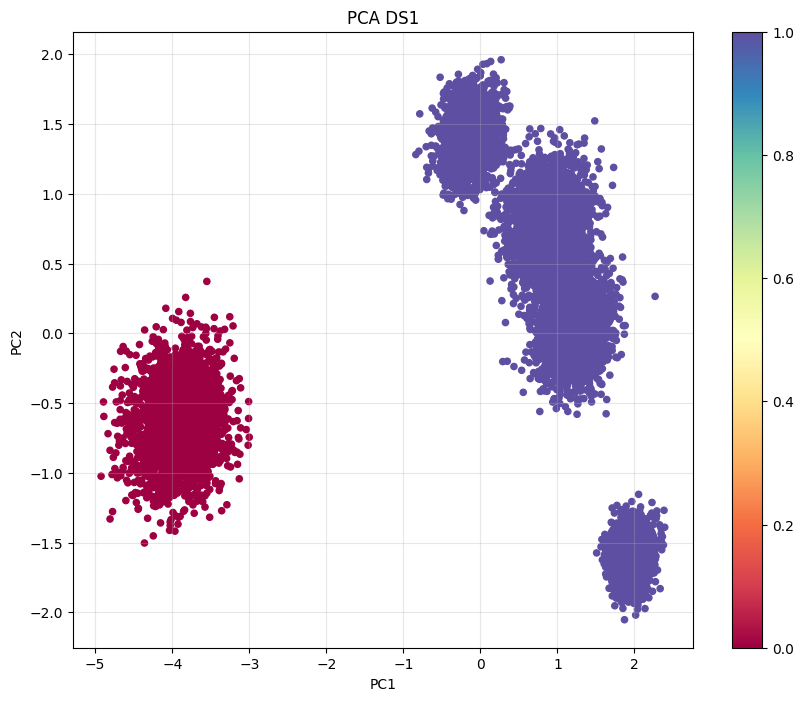

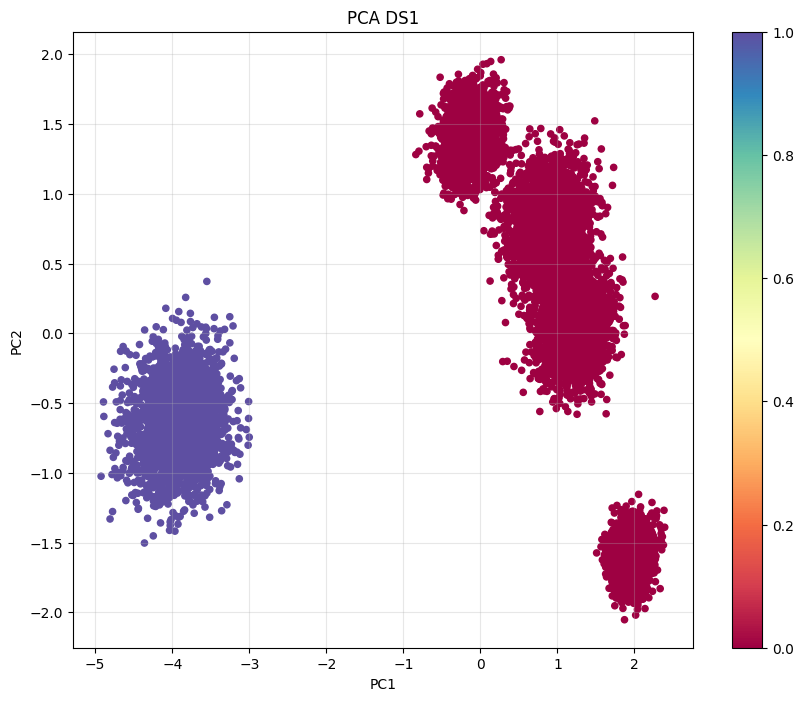

In [24]:
#Визуализация
#Первый датасет

def my_plot_2d_embedding(X_plot2d, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_plot2d[:, 0], X_plot2d[:, 1], c=labels, cmap='Spectral', s=20)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)

FIGURESDIR = Path('artifacts') / 'figures'
FIGURESDIR.mkdir(parents=True, exist_ok=True)

X1_plot2d = pca_2d_for_plot(X1_scaled, random_state=RANDOM_STATE)

my_plot_2d_embedding(X1_plot2d, best_kmeans1["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'FirstKMeans.png', dpi=150, bbox_inches='tight')
plt.show()

my_plot_2d_embedding(X1_plot2d, best_dbscan1["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'FirstDBSCAN.png', dpi=150, bbox_inches='tight')
plt.show()


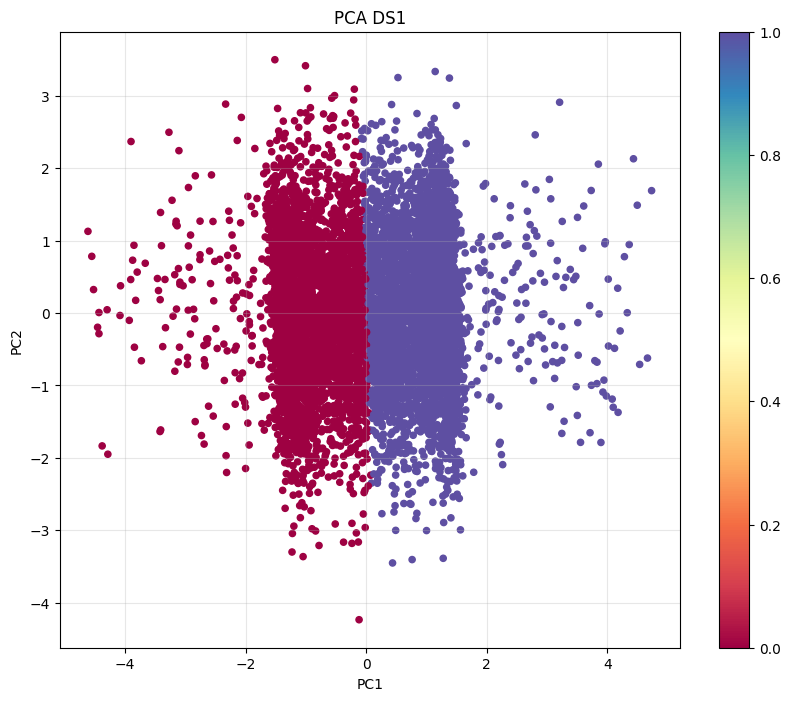

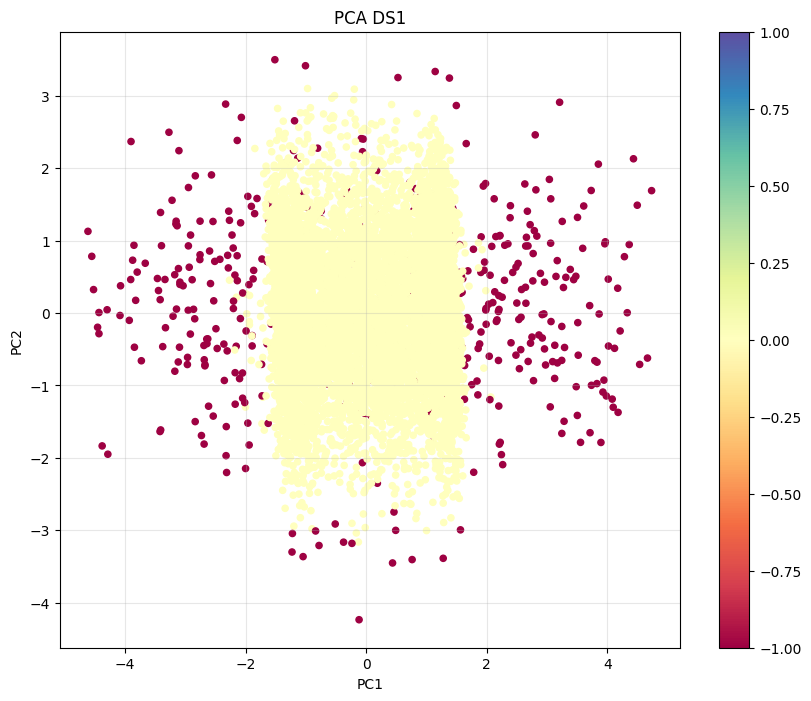

In [25]:
#Второй датасет

X2_plot2d = pca_2d_for_plot(X2_scaled, random_state=RANDOM_STATE)


my_plot_2d_embedding(X2_plot2d, best_kmeans2["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'SecondKMeans.png', dpi=150, bbox_inches='tight')
plt.show()

my_plot_2d_embedding(X2_plot2d, best_dbscan2["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'SecondDBSCAN.png', dpi=150, bbox_inches='tight')
plt.show()

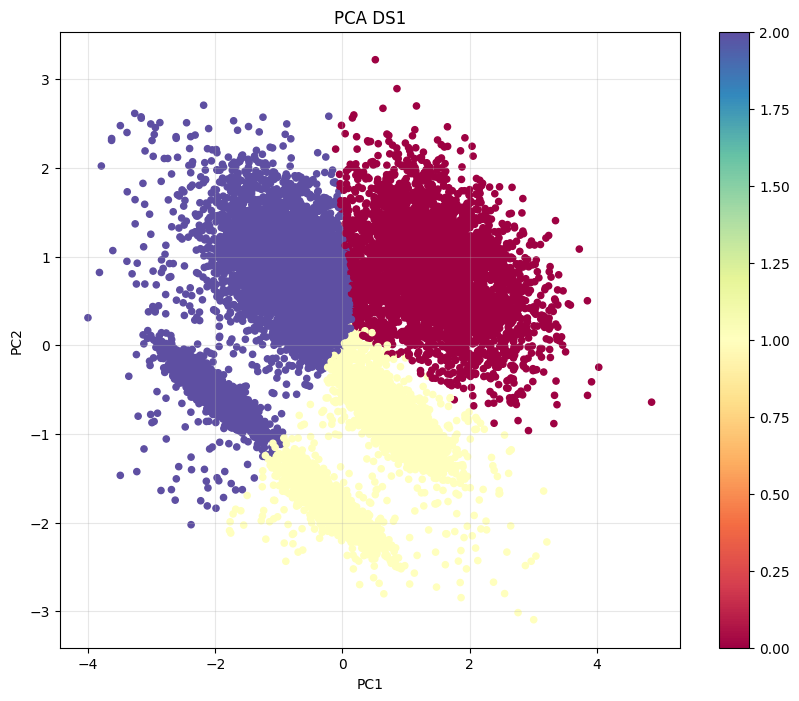

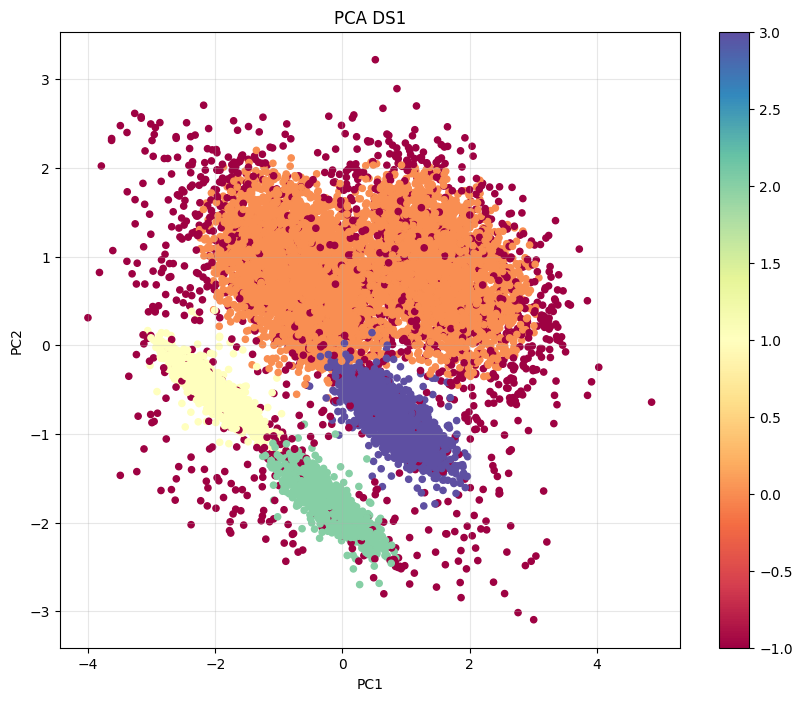

In [26]:
#Третий датасет

X3_plot2d = pca_2d_for_plot(X3_scaled, random_state=RANDOM_STATE)

my_plot_2d_embedding(X3_plot2d, best_kmeans3["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'ThirdKMeans.png', dpi=150, bbox_inches='tight')
plt.show()

my_plot_2d_embedding(X3_plot2d, best_dbscan3["labels"], "PCA DS1")
plt.savefig(FIGURESDIR / 'ThirdDBSCAN.png', dpi=150, bbox_inches='tight')
plt.show()

In [27]:
y2_true = np.squeeze(y2_true)

In [28]:
#NMI — метрика, которая позволяет сравнивать результат кластеризации с эталонной 
#(эвристической) разметкой.Используем его вместе с ARI
def external_metrics(y_true, labels):
    return {
        "ARI": float(adjusted_rand_score(y_true, labels)),
        "NMI": float(normalized_mutual_info_score(y_true, labels)),
    }

np.random.seed(42)
print("External metrics:")
print("KMeans best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_kmeans2["labels"]).items()})
print("DBSCAN best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_dbscan2["labels"]).items()})

np.random.seed(41)
print("External metrics:")
print("KMeans best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_kmeans2["labels"]).items()})
print("DBSCAN best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_dbscan2["labels"]).items()})

np.random.seed(40)
print("External metrics:")
print("KMeans best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_kmeans2["labels"]).items()})
print("DBSCAN best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_dbscan2["labels"]).items()})

np.random.seed(39)
print("External metrics:")
print("KMeans best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_kmeans2["labels"]).items()})
print("DBSCAN best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_dbscan2["labels"]).items()})

np.random.seed(38)
print("External metrics:")
print("KMeans best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_kmeans2["labels"]).items()})
print("DBSCAN best:", {k: round(v, 3) for k, v in external_metrics(y2_true, best_dbscan2["labels"]).items()})

#Вторая модель устойчива исходя из ARI и NMI метрик

External metrics:
KMeans best: {'ARI': 0.0, 'NMI': 0.143}
DBSCAN best: {'ARI': 0.0, 'NMI': 0.054}
External metrics:
KMeans best: {'ARI': 0.0, 'NMI': 0.143}
DBSCAN best: {'ARI': 0.0, 'NMI': 0.054}
External metrics:
KMeans best: {'ARI': 0.0, 'NMI': 0.143}
DBSCAN best: {'ARI': 0.0, 'NMI': 0.054}
External metrics:
KMeans best: {'ARI': 0.0, 'NMI': 0.143}
DBSCAN best: {'ARI': 0.0, 'NMI': 0.054}
External metrics:
KMeans best: {'ARI': 0.0, 'NMI': 0.143}
DBSCAN best: {'ARI': 0.0, 'NMI': 0.054}


In [29]:
def to_serializable(obj):
    """Рекурсивно конвертирует ndarray и sklearn объекты в сериализуемые."""
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif hasattr(obj, '__dict__'):  # Объекты с атрибутами (модели sklearn)
        serial = {}
        for key, val in obj.__dict__.items():
            serial[key] = to_serializable(val)
        return serial
    elif isinstance(obj, dict):
        return {k: to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, (list, tuple)):
        return [to_serializable(item) for item in obj]
    return obj

def save_json(obj, path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open('w', encoding='utf-8') as f:
        json.dump(to_serializable(obj), f, ensure_ascii=False, indent=2)
        
best_models = {}

best_models["FirstKMeans"] = best_kmeans1
best_models["FirstDBSCAN"] = best_dbscan1

best_models["SecondKMeans"] = best_kmeans2
best_models["SecondDBSCAN"] = best_dbscan2

best_models["ThirdKMeans"] = best_kmeans3
best_models["ThirdDBSCAN"] = best_dbscan3

ARTIFACTS_DIR = Path("artifacts")
search_path = ARTIFACTS_DIR / "metrics_summary.json"
save_json(best_models, search_path)

In [30]:
best_conf = {}

best_conf["FirstKMeansConf"] = best_kmeans1["params"]
best_conf["FirstDBSCANConf"] = best_dbscan1["params"]

best_conf["SecondKMeansConf"] = best_kmeans2["params"]
best_conf["SecondDBSCANConf"] = best_dbscan2["params"]

best_conf["ThirdKMeansConf"] = best_kmeans3["params"]
best_conf["ThirdDBSCANConf"] = best_dbscan3["params"]

ARTIFACTS_DIR = Path("artifacts")
search_path1 = ARTIFACTS_DIR / "best_configs.json"
save_json(best_conf, search_path1)

In [32]:
LABELSDIR = Path("artifacts/labels")

# === ДАТАСЕТ 1 ===
y1_true = np.squeeze(y1_true)
best_labels_ds1 = best_kmeans1["labels"] 
df_labels_ds1 = pd.DataFrame({
    'sample_id': y1_true,
    'cluster_label': best_labels_ds1
})
df_labels_ds1.to_csv(LABELSDIR / 'labels_hw07_ds1.csv', index=False)

y2_true = np.squeeze(y2_true)
# === ДАТАСЕТ 2 ===
best_labels_ds2 = best_dbscan2["labels"]
df_labels_ds2 = pd.DataFrame({
    'sample_id': y2_true,
    'cluster_label': best_labels_ds2
})
df_labels_ds2.to_csv(LABELSDIR / 'labels_hw07_ds2.csv', index=False)

y3_true = np.squeeze(y3_true)
# === ДАТАСЕТ 3 ===
best_labels_ds3 = best_kmeans3["labels"]
df_labels_ds3 = pd.DataFrame({
    'sample_id': y3_true,
    'cluster_label': best_labels_ds3
})
df_labels_ds3.to_csv(LABELSDIR / 'labels_hw07_ds3.csv', index=False)


S07-hw-dataset-01.csv
Числовые признаки в разных шкалах искажали расстояния + шумовые признаки. Результаты на KMeans и DBSCAN одинаковые.

S07-hw-dataset-02.csv
Нелинейная структура + выбросы + лишний шумовой признак. Это всё мешало подбору k. DBSCAN нашел нелинейные кластеры и выделил выбросы

S07-hw-dataset-03.csv
Кластеры разной плотности + фоновый шум сбивали DBSCAN. KMeans ссправился лучше за счет равномерного разделения пространства.